# The Battle of Neighborhoods in Brussels

## 1. Introduction
In this project we investigate the best location for opening a restaurant in Brussels. We also provide the best food category for each neighborhood. Our analysis consists in doing the data analysis about Brussels' demographics, average income, and the most commom venues in the city. The datasets used in this project are available on the following websites: 
* [statbel.fgov.be](https://statbel.fgov.be/en) and [monitoringdesquartiers.brussels](http://monitoringdesquartiers.brussels)

We also use data from Foursquare API to get the best venues in Brussels. Finally we run k-means to cluster neighborhoods into k clusters, and then we classify ecah element.

## 2. Data Analysis
In this section we analyze the datasets. Let's first import the libraires that will be used in this work.

In [1]:
#basic libraries 
import pandas as pd
import geopandas as gpd
import numpy as np

# Matplotlib and associated plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#import plotly.figure_factory as ff

#create wordcloud
from wordcloud import WordCloud, STOPWORDS
import folium
import requests

#get latitude and longitude
from geopy.geocoders import Nominatim

#import libraries for cluster analysis
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 
print('Libraries imported.')

Libraries imported.


### Average Income in Brussels 

In [2]:
nbd = gpd.read_file("http://monitoringdesquartiers.brussels/webservice/fr/map/municipalities?indicator=revenu-median-des-declarations&year=2016")
nbd.head()

,id,code,name,value,hidden,fill,stroke,stroke-width,stroke-opacity,geometry
0,7100,21001,Anderlecht,17872,None,#99CCCC,#000,0.1,1,"POLYGON ((141192.712 167692.867, 141304.434 16..."
1,7200,21002,Auderghem,24078,None,#003399,#000,0.1,1,"POLYGON ((151916.411 167274.532, 152033.864 16..."
2,7300,21003,Berchem-Sainte-Agathe,21125,None,#3366CC,#000,0.1,1,"POLYGON ((143690.472 172796.969, 143692.277 17..."
3,7400,21004,Bruxelles,17802,None,#CCFFCC,#000,0.1,1,"POLYGON ((146126.143 175893.190, 146442.093 17..."
4,7500,21005,Etterbeek,20013,None,#6699CC,#000,0.1,1,"POLYGON ((150725.216 169289.996, 150736.002 16..."


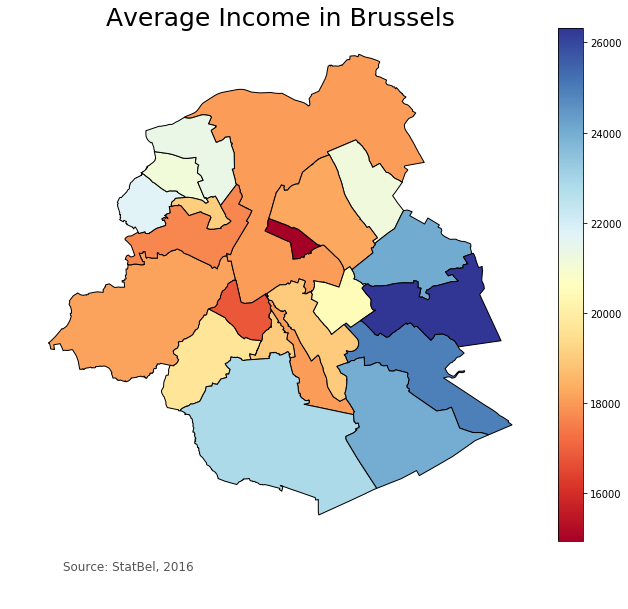

In [3]:
#create the map
fig, ax = plt.subplots(1, figsize = (10, 10))
variable = "value"
color = 'RdYlBu'
# set the range for the choropleth
vmin = int(nbd[variable].min(axis = 0))
vmax = int(nbd[variable].max(axis = 0)) + 1000

nbd.plot(column = 'value', cmap = 'RdYlBu', edgecolor = "k", ax = ax)
ax.axis("off")

#add a title
ax.set_title("Average Income in Brussels", 
             fontdict={"fontsize": "25", "fontweight" : "3"})
# create an annotation for the data source
ax.annotate("Source: StatBel, 2016", xy = (0.1, .08), xycoords = "figure fraction",
            horizontalalignment = "left", verticalalignment = "top", fontsize = "12", color="#555555")

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap = color, norm = plt.Normalize(vmin = vmin, vmax = vmax))
sm._A = []
cbar = fig.colorbar(sm, fraction = 0.046, pad = 0.04)

fig.savefig("Brussels_income.png", dpi = 300)

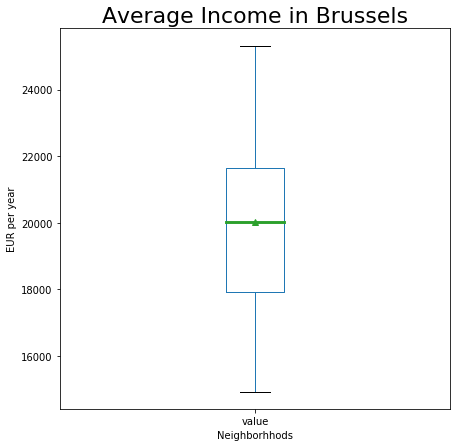

In [4]:
medianprops = dict(linestyle = '-', linewidth = 2.9)
fig, ax = plt.subplots(1, figsize = (7, 7))

nbd.boxplot(column = ["value"], showmeans = True, medianprops = medianprops, grid = False)
ax.set_title("Average Income in Brussels", fontsize = 22)
ax.set_xlabel("Neighborhhods")
ax.set_ylabel("EUR per year")

fig.savefig("bxl_avg_box.png", dpi = 300)

### Immigration in Brussels
In Brussels there are a large number of different nationalities. Some reflect historic migratory flows, others reflect recent political changes. So we consider nine groups of different natinalities that represent the migrants in Brussels.

 1. **UE15**: This includes Germany, Austria, Luxembourg, Netherlands, Denmark, Spain, Portugal, Finland, France, United Kingdom, Greece, Ireland, Sweden, and Italy.
 
 2. **UE-NEW13**: This includes the new EU members that entered in 2004, 2007, and 2013: Latvia, Lithuania, Bulgaria, Malta, Cyprus, Poland, Estonia, Czech Republic, Romania, Slovakia, Hungary, Slovenia, and Croatia.
 
 3. **R-EU**: This includes the other countries belonging to the geographical continent "Europe".
 
 4. **Turkey**.
 
 5. **North Africa**: Algeria, Libya, Tunisia, Morocco, and Egypt.
 
 6. **Sub-Saharan Africa**: All African countries except North African countries.
 
 7. **Latin America**: Here it is used the definition in terms of physical geography, i.e., all countries in America except USA and Canada.
 
 8. **RCO-EU**: Australia, Canada, South Korea, United States, Japan, New Zealand, and Israel.
 
 9. **Other Countries**: This includes all other nationalities, as well as refugees whose country of origin is unknown, those whose nationality is unknown and stateless persons.

In [5]:
df = pd.read_excel("/Users/user/Desktop/Brussels_foreign_population_2019.xls", header = None)
df.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Code,Territoire,Part de l'Europe des 15 (hors Belgique) (%),Part des nouveaux états membres de l'U.E. (ent...,Part du reste de l'Europe (hors UE28) (%),"Part des pays OCDE (hors Europe, Turquie et Am...",Part de l'Afrique du Nord (%),Part de la Turquie (%),Part de l'Amérique latine (%),Part de l'Afrique subsaharienne (%),Part des autres pays (%),Part des Français (%),Population totale de nationalité étrangère (No...
3,NaN,NaN,-2019-,-2019-,-2019-,-2019-,-2019-,-2019-,-2019-,-2019-,-2019-,-2019-,-2016-
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,21001,Anderlecht,10.4006,8.9647,0.745945,0.0843677,4.72292,0.508712,0.650718,2.69225,3.62531,2.1401,37481
6,21002,Auderghem,15.2177,5.68312,0.56449,3.11646,0.961397,0.117602,0.55861,1.27598,2.25796,5.13333,9519


In [6]:
df.dropna(axis = 'index', inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
2,Code,Territoire,Part de l'Europe des 15 (hors Belgique) (%),Part des nouveaux états membres de l'U.E. (ent...,Part du reste de l'Europe (hors UE28) (%),"Part des pays OCDE (hors Europe, Turquie et Am...",Part de l'Afrique du Nord (%),Part de la Turquie (%),Part de l'Amérique latine (%),Part de l'Afrique subsaharienne (%),Part des autres pays (%),Part des Français (%),Population totale de nationalité étrangère (No...
5,21001,Anderlecht,10.4006,8.9647,0.745945,0.0843677,4.72292,0.508712,0.650718,2.69225,3.62531,2.1401,37481
6,21002,Auderghem,15.2177,5.68312,0.56449,3.11646,0.961397,0.117602,0.55861,1.27598,2.25796,5.13333,9519
7,21003,Berchem-Sainte-Agathe,6.90258,4.74999,0.770483,0.063545,3.03825,0.349498,0.309782,1.71174,1.49728,1.68394,4577
8,21004,Bruxelles,15.1338,6.92086,1.07194,0.567888,4.67902,0.730771,0.672441,2.91483,3.62414,4.78633,65692


In [7]:
cols = [0, 11, 12]
df.drop(df.columns[cols], axis = 1, inplace = True)
df.head()

,1,2,3,4,5,6,7,8,9,10
2,Territoire,Part de l'Europe des 15 (hors Belgique) (%),Part des nouveaux états membres de l'U.E. (ent...,Part du reste de l'Europe (hors UE28) (%),"Part des pays OCDE (hors Europe, Turquie et Am...",Part de l'Afrique du Nord (%),Part de la Turquie (%),Part de l'Amérique latine (%),Part de l'Afrique subsaharienne (%),Part des autres pays (%)
5,Anderlecht,10.4006,8.9647,0.745945,0.0843677,4.72292,0.508712,0.650718,2.69225,3.62531
6,Auderghem,15.2177,5.68312,0.56449,3.11646,0.961397,0.117602,0.55861,1.27598,2.25796
7,Berchem-Sainte-Agathe,6.90258,4.74999,0.770483,0.063545,3.03825,0.349498,0.309782,1.71174,1.49728
8,Bruxelles,15.1338,6.92086,1.07194,0.567888,4.67902,0.730771,0.672441,2.91483,3.62414


In [8]:
col_list = ["Neighborhood", "UE15(%)", "UE-NEW13(%)", "R-EU(%)", "RCO-EU(%)", 
            "North_Africa(%)", "Turkey(%)", "Latin_America(%)", "Sub-Saharan_Africa(%)", "Other_Countries(%)"]
df.columns = col_list
df.columns

Index(['Neighborhood', 'UE15(%)', 'UE-NEW13(%)', 'R-EU(%)', 'RCO-EU(%)',
       'North_Africa(%)', 'Turkey(%)', 'Latin_America(%)',
       'Sub-Saharan_Africa(%)', 'Other_Countries(%)'],
      dtype='object')

In [9]:
df.drop(df.index[0], inplace = True)
df.head()

,Neighborhood,UE15(%),UE-NEW13(%),R-EU(%),RCO-EU(%),North_Africa(%),Turkey(%),Latin_America(%),Sub-Saharan_Africa(%),Other_Countries(%)
5,Anderlecht,10.4006,8.9647,0.745945,0.0843677,4.72292,0.508712,0.650718,2.69225,3.62531
6,Auderghem,15.2177,5.68312,0.56449,3.11646,0.961397,0.117602,0.55861,1.27598,2.25796
7,Berchem-Sainte-Agathe,6.90258,4.74999,0.770483,0.063545,3.03825,0.349498,0.309782,1.71174,1.49728
8,Bruxelles,15.1338,6.92086,1.07194,0.567888,4.67902,0.730771,0.672441,2.91483,3.62414
9,Etterbeek,26.7,9.83315,1.14748,0.982075,1.53617,0.239833,1.25499,1.57339,5.12746


In [10]:
df.reset_index(drop = True)

,Neighborhood,UE15(%),UE-NEW13(%),R-EU(%),RCO-EU(%),North_Africa(%),Turkey(%),Latin_America(%),Sub-Saharan_Africa(%),Other_Countries(%)
0,Anderlecht,10.4006,8.9647,0.745945,0.0843677,4.72292,0.508712,0.650718,2.69225,3.62531
1,Auderghem,15.2177,5.68312,0.56449,3.11646,0.961397,0.117602,0.55861,1.27598,2.25796
2,Berchem-Sainte-Agathe,6.90258,4.74999,0.770483,0.063545,3.03825,0.349498,0.309782,1.71174,1.49728
3,Bruxelles,15.1338,6.92086,1.07194,0.567888,4.67902,0.730771,0.672441,2.91483,3.62414
4,Etterbeek,26.7,9.83315,1.14748,0.982075,1.53617,0.239833,1.25499,1.57339,5.12746
5,Evere,8.21062,6.02926,1.55401,0.483682,2.34657,0.876374,0.438187,1.49654,5.68685
6,Forest,18.7355,5.95321,0.614685,0.302013,3.8551,0.0817211,1.1743,2.35215,1.9773
7,Ganshoren,6.79865,7.20424,1.01197,0.0682676,2.81102,0.329291,0.365432,1.77094,1.76693
8,Ixelles,30.6667,5.38008,1.16718,1.39855,1.89811,0.25899,1.43653,2.50357,3.84341
9,Jette,7.25407,7.49962,1.06023,0.0856556,2.73717,0.371174,0.340719,1.89013,2.45546


In [11]:
bxl = nbd.set_index("name").join(df.set_index("Neighborhood"))
bxl.head()

,id,code,value,hidden,fill,stroke,stroke-width,stroke-opacity,geometry,UE15(%),UE-NEW13(%),R-EU(%),RCO-EU(%),North_Africa(%),Turkey(%),Latin_America(%),Sub-Saharan_Africa(%),Other_Countries(%)
name,,,,,,,,,,,,,,,,,,
Anderlecht,7100,21001,17872,None,#99CCCC,#000,0.1,1,"POLYGON ((141192.712 167692.867, 141304.434 16...",10.4006,8.9647,0.745945,0.0843677,4.72292,0.508712,0.650718,2.69225,3.62531
Auderghem,7200,21002,24078,None,#003399,#000,0.1,1,"POLYGON ((151916.411 167274.532, 152033.864 16...",15.2177,5.68312,0.56449,3.11646,0.961397,0.117602,0.55861,1.27598,2.25796
Berchem-Sainte-Agathe,7300,21003,21125,None,#3366CC,#000,0.1,1,"POLYGON ((143690.472 172796.969, 143692.277 17...",6.90258,4.74999,0.770483,0.063545,3.03825,0.349498,0.309782,1.71174,1.49728
Bruxelles,7400,21004,17802,None,#CCFFCC,#000,0.1,1,"POLYGON ((146126.143 175893.190, 146442.093 17...",15.1338,6.92086,1.07194,0.567888,4.67902,0.730771,0.672441,2.91483,3.62414
Etterbeek,7500,21005,20013,None,#6699CC,#000,0.1,1,"POLYGON ((150725.216 169289.996, 150736.002 16...",26.7,9.83315,1.14748,0.982075,1.53617,0.239833,1.25499,1.57339,5.12746


## 3. Data Visualization

### Migrants from UE15

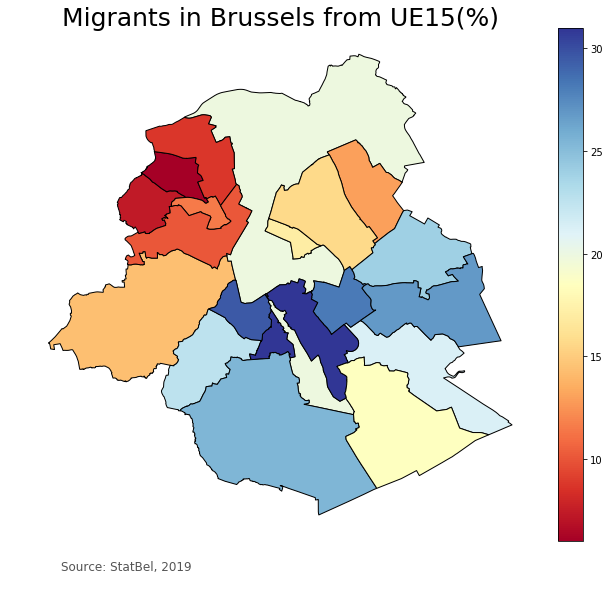

In [12]:
# set a variable that will call whatever column we want to visualise on the map
variable = "UE15(%)"
color = 'RdYlBu'
# set the range for the choropleth
vmin = int(bxl[variable].min(axis = 0))
vmax = int(bxl[variable].max(axis = 0)) + 1

#create the map
fig, ax = plt.subplots(1, figsize = (10, 10))

bxl.plot(column = variable, cmap = color, edgecolor = "k", ax = ax)
#remove axis
ax.axis("off")

#add a title
ax.set_title("Migrants in Brussels from UE15(%)", 
             fontdict={"fontsize": "25", "fontweight" : "3"})
# create an annotation for the data source
ax.annotate("Source: StatBel, 2019", xy = (0.1, .08), xycoords = "figure fraction",
            horizontalalignment = "left", verticalalignment = "top", fontsize = "12", color="#555555")

fig.savefig("UE15.png", dpi = 300)
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap = color, norm = plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, fraction = 0.046, pad = 0.04)
fig.savefig("Brussels-UE15.png", dpi = 300)

## Migrants from UE New Members (2004-2007-2013)

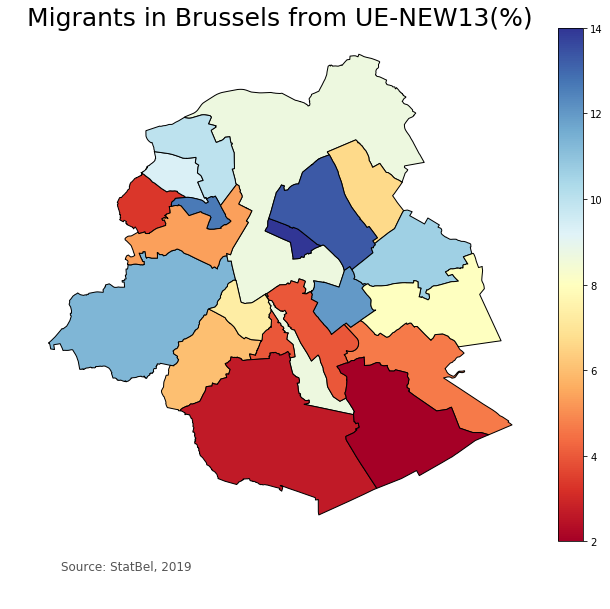

In [13]:
# set a variable that will call whatever column we want to visualise on the map
variable = "UE-NEW13(%)"
color = 'RdYlBu'

# set the range for the choropleth
vmin = int(bxl[variable].min(axis = 0))
vmax = int(bxl[variable].max(axis = 0)) + 1

#create the map
fig, ax = plt.subplots(1, figsize = (10, 10))

bxl.plot(column = variable, cmap = color, edgecolor = "k", ax = ax)
#remove axis
ax.axis("off")

#add a title
ax.set_title("Migrants in Brussels from UE-NEW13(%)", 
             fontdict={"fontsize": "25", "fontweight" : "3"})
# create an annotation for the data source
ax.annotate("Source: StatBel, 2019", xy = (0.1, .08), xycoords = "figure fraction",
            horizontalalignment = "left", verticalalignment = "top", fontsize = "12", color="#555555")

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap = color, norm = plt.Normalize(vmin = vmin, vmax = vmax))
sm._A = []
cbar = fig.colorbar(sm, fraction = 0.046, pad = 0.04)


### Restaurants in Brussels
Use geopy library to get the latitude and longitude values of Brussels.


In [14]:
address = 'Brussels'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brussels are {}, and {}.'.format(latitude, longitude))

The geograpical coordinate of Brussels are 50.8465573, and 4.351697.


### New Data about Latitude and Longitude

In [15]:
bxl_gps = pd.read_json("/Users/user/Desktop/Brussels_postal_codes.json")
bxl_gps.head()

,zip,city,lng,lat
0,1070,Anderlecht,4.312340,50.838141
1,1160,Auderghem,4.433139,50.815657
2,1082,Berchem-Sainte-Agathe,4.292702,50.863984
3,1000,Bruxelles,4.351697,50.846557
4,1040,Etterbeek,4.389510,50.836851


In [16]:
bxl_gps.rename(columns = {"zip": "Postal_Code", "city": "Neighborhood", "lng": "Longitude", "lat": "Latitude"}, inplace = True)
bxl_gps.columns

Index(['Postal_Code', 'Neighborhood', 'Longitude', 'Latitude'], dtype='object')

In [17]:
# create map of Manhattan using latitude and longitude values
map_bxl = folium.Map(location = [latitude, longitude], zoom_start = 12)

# add markers to map
for lat, lng, label in zip(bxl_gps['Latitude'], bxl_gps['Longitude'], bxl_gps['Neighborhood']):
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_bxl)  
    
map_bxl.save('map_bxl.html')
map_bxl

## 4. FourSquare API

In [13]:
CLIENT_ID = 'Your CLIENT_ID' # your Foursquare ID
CLIENT_SECRET = 'YOUR CLIENT_SECRET' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Your CLIENT_ID
CLIENT_SECRET:YOUR CLIENT_SECRET


Let's take a look into the categoris list of FourSquare.

In [19]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 15910


In [20]:
#create a category list to see their keys
category_list = category_results['response']['categories']
print("The number of keys in the categories:", len(category_list))

The number of keys in the categories: 10


In [21]:
#give the keys of FourSquare venue category hierarchy
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


Now we search for more information about the types of food, i.e., we create a function that returns a dictionary with Ids', Names of Food, and its Sub-Categories.

In [22]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [23]:
# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')

### Explore some results in the neighborhoods

In [24]:
def getNearbyFood(names, latitudes, longitudes, radius = 1000, LIMIT = 500):
    not_found = 0
    print('***Start ', end = '')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

In [25]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('bxl_food_venues.pkl', 'rb') as f:
        bxl_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    bxl_venues = getNearbyFood(names = bxl_gps['Neighborhood'],
                                        latitudes = bxl_gps['Latitude'],
                                        longitudes = bxl_gps['Longitude']
                                       )
    with open('bxl_food_venues.pkl', 'wb') as f:
        pickle.dump(bxl_venues, f)
    print("---Dataframe Created and Serialized---")

---Dataframe Existed and Deserialized---


In [26]:
print("The shape of venues is", bxl_venues.shape)
bxl_venues.head()

The shape of venues is (942, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Anderlecht,50.838141,4.31234,Monsif,50.838842,4.311248,Bakery
1,Anderlecht,50.838141,4.31234,Snack Aumale,50.838778,4.310730,Restaurant
2,Anderlecht,50.838141,4.31234,C'est Si Bon,50.834324,4.304310,Bakery
3,Anderlecht,50.838141,4.31234,Friterie Chez Le Grec,50.843858,4.313597,Friterie
4,Anderlecht,50.838141,4.31234,Les Mystères du Cygne,50.833200,4.302369,Bakery


Let's check how many venues were returned for each neighborhood.

In [27]:
bxl_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Anderlecht,49,49,49,49,49,49
Auderghem,50,50,50,50,50,50
Berchem-Sainte-Agathe,50,50,50,50,50,50
Bruxelles,50,50,50,50,50,50
Etterbeek,50,50,50,50,50,50
Evere,50,50,50,50,50,50
Forest,50,50,50,50,50,50
Ganshoren,49,49,49,49,49,49
Ixelles,50,50,50,50,50,50


Let's find out how many unique categories can be curated from all the returned venues.

In [28]:
print('There are {} uniques categories.'.format(len(bxl_venues['Venue Category'].unique())))

There are 101 uniques categories.


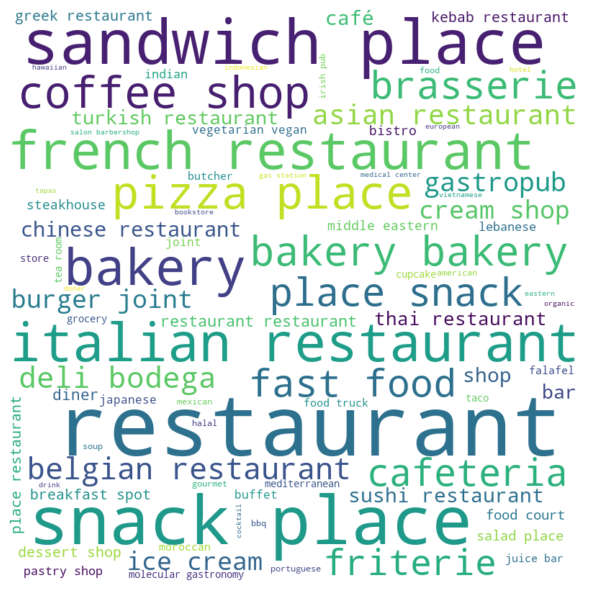

In [29]:
comment_words = '' 
stopwords = set(STOPWORDS)
# iterate through the csv file 
for val in bxl_venues["Venue Category"]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation = "bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.savefig('Brussels_food.png', dpi = 300)

plt.show() 



### Analysis of Each Neighborhood

In [30]:
# one hot encoding
bxl_onehot = pd.get_dummies(bxl_venues[['Venue Category']], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
bxl_onehot['Neighborhood'] = bxl_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bxl_onehot.columns[-1]] + list(bxl_onehot.columns[:-1])
bxl_onehot = bxl_onehot[fixed_columns]

bxl_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Garden,Belgian Restaurant,...,Swiss Restaurant,Syrian Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Anderlecht,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Anderlecht,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anderlecht,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
print("The shape of the new dataframe size is:", bxl_onehot.shape)

The shape of the new dataframe size is: (942, 102)


Let's count venues of each category in each neighborhood.

In [31]:
venue_counts = bxl_onehot.groupby('Neighborhood').sum()
venue_counts.index.name = None
venue_counts

,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Garden,Belgian Restaurant,Bistro,...,Swiss Restaurant,Syrian Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
Anderlecht,0,0,1,0,0,7,0,0,3,0,...,0,0,1,0,0,0,0,0,0,0
Auderghem,1,0,0,0,0,6,0,0,2,1,...,0,0,0,0,1,4,0,0,0,0
Berchem-Sainte-Agathe,0,0,0,0,0,6,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Bruxelles,0,1,1,0,0,2,1,1,0,0,...,0,0,1,1,1,1,0,1,0,0
Etterbeek,0,0,0,0,0,6,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
Evere,0,0,1,0,0,2,0,0,3,1,...,0,0,0,0,0,0,0,0,0,1
Forest,0,0,1,0,0,6,1,0,0,2,...,0,0,0,0,0,2,0,0,0,0
Ganshoren,0,0,3,0,0,8,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
Ixelles,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2,0,3,0,0
Jette,0,0,2,0,0,9,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Now, let's find out the top 10 food categories in Brussels.

In [32]:
venue_counts_described = venue_counts.describe().transpose()
venue_top10 = venue_counts_described.sort_values('max', ascending = False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Coffee Shop,19.0,1.631579,2.890800,0.0,0.0,1.0,2.0,13.0
Snack Place,19.0,3.631579,3.269565,0.0,1.0,3.0,6.0,11.0
Italian Restaurant,19.0,2.421053,2.316985,0.0,1.0,2.0,2.5,9.0
Bakery,19.0,4.894737,2.514287,1.0,3.0,5.0,6.5,9.0
Sandwich Place,19.0,3.000000,1.795055,0.0,1.5,3.0,4.0,7.0
French Restaurant,19.0,2.263158,1.910268,0.0,1.0,2.0,3.0,6.0
Fast Food Restaurant,19.0,1.210526,1.583910,0.0,0.0,1.0,1.5,6.0
Restaurant,19.0,2.105263,1.852768,0.0,1.0,2.0,3.0,6.0
Turkish Restaurant,19.0,0.684211,1.529438,0.0,0.0,0.0,0.5,6.0
Cafeteria,19.0,1.105263,1.523692,0.0,0.0,0.0,2.0,5.0


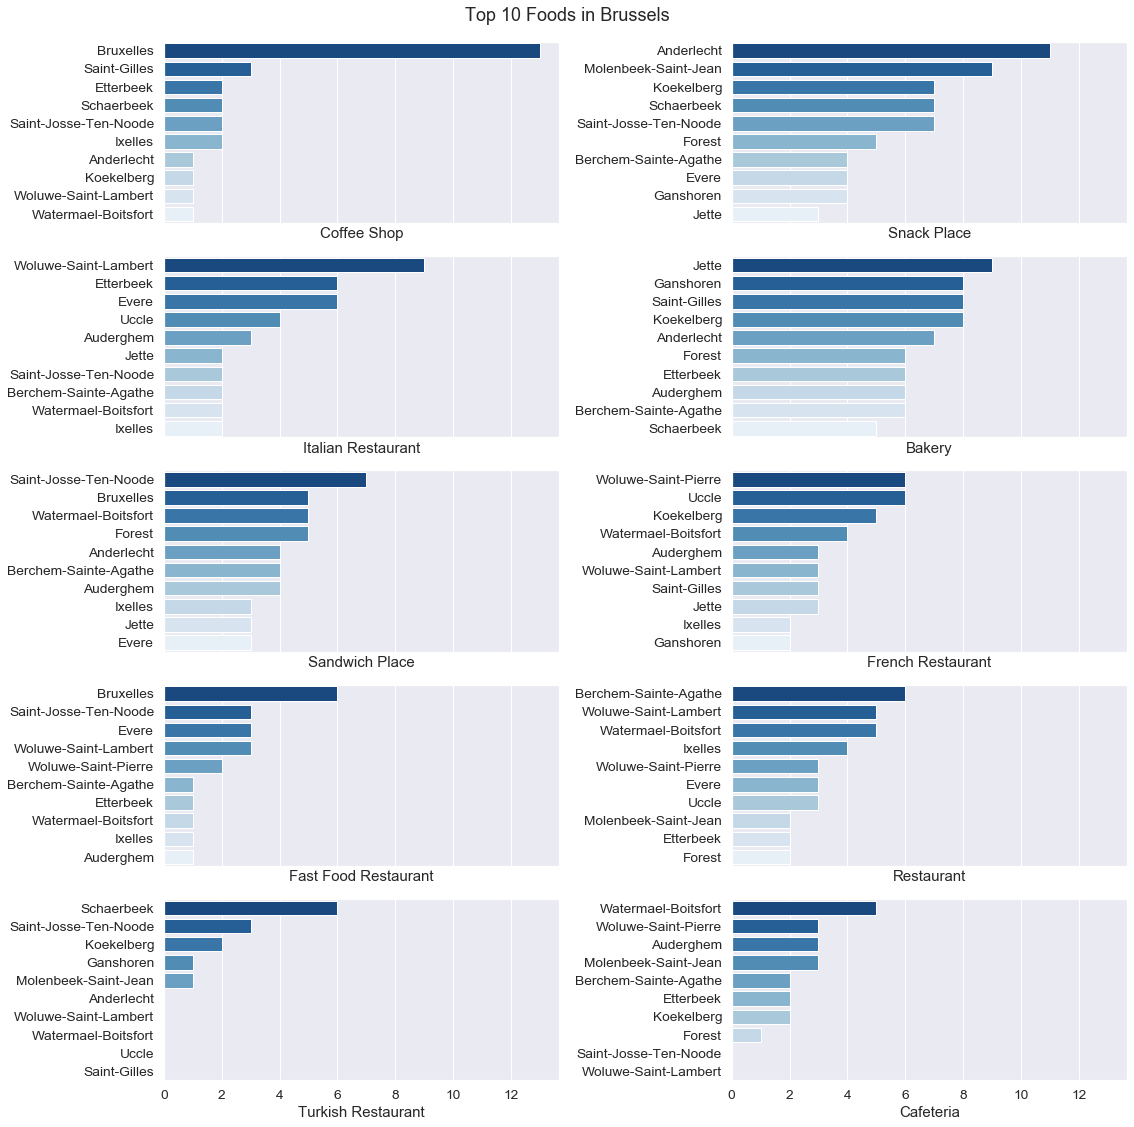

In [33]:
venue_top10_list = venue_top10.index.values.tolist()
sns.set(font_scale = 1.25)
fig, axes = plt.subplots(5, 2, figsize = (16, 16), sharex = True)
axes = axes.flatten()
fig.suptitle("Top 10 Foods in Brussels")


for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending = False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x = category, y = data.index, data = data, ax = ax, palette = np.array(pal[::-1]))
    
# Tight layout often produces nice results
# but requires the title to be spaced accordingly    
plt.tight_layout()
fig.subplots_adjust(top = 0.95)

plt.savefig("Brussels_top10.png", dpi = 300)
plt.show();

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [34]:
bxl_grouped = bxl_onehot.groupby('Neighborhood').mean().reset_index()
bxl_grouped

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Garden,Belgian Restaurant,...,Swiss Restaurant,Syrian Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Anderlecht,0.00,0.000000,0.020408,0.000000,0.000000,0.142857,0.000000,0.00,0.061224,...,0.000000,0.00,0.020408,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
1,Auderghem,0.02,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.00,0.040000,...,0.000000,0.00,0.000000,0.000000,0.020000,0.08,0.000000,0.000000,0.00,0.00
2,Berchem-Sainte-Agathe,0.00,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.00,0.040000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
3,Bruxelles,0.00,0.020000,0.020000,0.000000,0.000000,0.040000,0.020000,0.02,0.000000,...,0.000000,0.00,0.020000,0.020000,0.020000,0.02,0.000000,0.020000,0.00,0.00
4,Etterbeek,0.00,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.02,0.00
5,Evere,0.00,0.000000,0.020000,0.000000,0.000000,0.040000,0.000000,0.00,0.060000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.02
6,Forest,0.00,0.000000,0.020000,0.000000,0.000000,0.120000,0.020000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.04,0.000000,0.000000,0.00,0.00
7,Ganshoren,0.00,0.000000,0.061224,0.000000,0.000000,0.163265,0.020408,0.00,0.020408,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.020408,0.000000,0.00,0.00
8,Ixelles,0.00,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.04,0.000000,0.060000,0.00,0.00
9,Jette,0.00,0.000000,0.040816,0.000000,0.000000,0.183673,0.020408,0.00,0.020408,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00


In [35]:
print("Let's confirm the new size:", bxl_grouped.shape)

Let's confirm the new size: (19, 102)


## Top 10 Most Common Venues in Each Neighborhood

First, let's write a function to sort the venues in descending order.

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['Neighborhood'] = bxl_grouped['Neighborhood']

for ind in np.arange(bxl_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bxl_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anderlecht,Snack Place,Bakery,Burger Joint,Sandwich Place,Belgian Restaurant,French Restaurant,Hot Dog Joint,Restaurant,Ice Cream Shop,Indian Restaurant
1,Auderghem,Bakery,Thai Restaurant,Sandwich Place,Cafeteria,Italian Restaurant,French Restaurant,Brasserie,Food Truck,Salad Place,Belgian Restaurant
2,Berchem-Sainte-Agathe,Bakery,Restaurant,Sandwich Place,Snack Place,Pizza Place,Diner,Greek Restaurant,Cafeteria,Belgian Restaurant,Brasserie
3,Bruxelles,Coffee Shop,Fast Food Restaurant,Sandwich Place,Ice Cream Shop,Pizza Place,Brasserie,Sushi Restaurant,Bakery,Beer Garden,Café
4,Etterbeek,Italian Restaurant,Bakery,Sandwich Place,Café,Gastropub,Brasserie,Cafeteria,Restaurant,Coffee Shop,Irish Pub


## 5. Cluster Neighborhoods
In thi section, we run *k*-means to cluster the neighborhood into $k$ clusters. To do that, we first need to find the optimal value for $k$. We use two methods to find this mysterious $k$ in *k*-Means: **The Elbow Method** and **The Silhouette Method**.

### The Elbow Method
In this method, our approach consists in computing the Within-Cluster-Sum of Squared Errors (WSS) for different values of $k$, and choosing the $k$ for which WSS first starts to diminish. In the plot of WSS-versus-$k$, this is visible as an elbow.

Let's break the Within-Cluster-Sum in the following way:
* The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.
* The WSS score is the sum of these Squared Errors for all the points.
* Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.

In [38]:
bxl_grouped_clustering = bxl_grouped.drop('Neighborhood', 1)
sum_of_squared_distances = []
K = range(1, 19)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(bxl_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

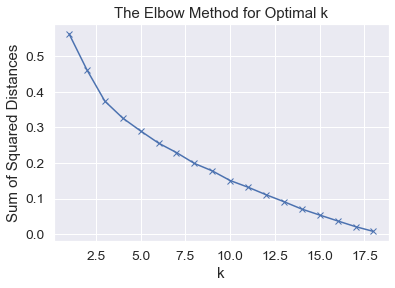

In [39]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method for Optimal k');

Unfortunately, the Elbow method does not seem to help us to determine the optimal number of clusters.

### The Silhouete Method

From Wikipedia, we see that _The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation)_. The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

We use the metrics module of the sklearn library to calculate the Silhouette score. The Silhouette Score reaches its global maximum at the optimal $k$. This should appear as a peak in the Silhouette Value-versus-k plot.

In [40]:
sil = []
K_sil = range(2, 19)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(bxl_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(bxl_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

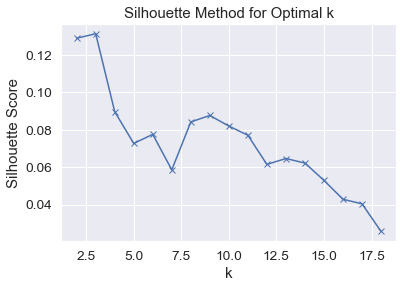

In [41]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

There is a peak at k = 3, and k = 9. Three clusters give a broad classification about the neighborhoods. Hence we take the number of clusters in our analysis to be 9.

### Clusters = 9
Let's run *k*-means to cluster the neighborhood into 9 clusters.

In [42]:
# set number of clusters
kclusters = 9

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters = kclusters, random_state = 0).fit(bxl_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 5, 0, 6, 5, 0, 3, 2, 1, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [43]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis = 1)
except:    
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_venues_sorted.head() 

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Anderlecht,Snack Place,Bakery,Burger Joint,Sandwich Place,Belgian Restaurant,French Restaurant,Hot Dog Joint,Restaurant,Ice Cream Shop,Indian Restaurant
1,5,Auderghem,Bakery,Thai Restaurant,Sandwich Place,Cafeteria,Italian Restaurant,French Restaurant,Brasserie,Food Truck,Salad Place,Belgian Restaurant
2,0,Berchem-Sainte-Agathe,Bakery,Restaurant,Sandwich Place,Snack Place,Pizza Place,Diner,Greek Restaurant,Cafeteria,Belgian Restaurant,Brasserie
3,6,Bruxelles,Coffee Shop,Fast Food Restaurant,Sandwich Place,Ice Cream Shop,Pizza Place,Brasserie,Sushi Restaurant,Bakery,Beer Garden,Café
4,5,Etterbeek,Italian Restaurant,Bakery,Sandwich Place,Café,Gastropub,Brasserie,Cafeteria,Restaurant,Coffee Shop,Irish Pub


In [44]:
# merge neighborhoods_venues_sorted with bxl_gps to add latitude/longitude for each neighborhood
bxl_merged = neighborhoods_venues_sorted.join(bxl_gps.set_index('Neighborhood'), on = 'Neighborhood')
bxl_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal_Code,Longitude,Latitude
0,4,Anderlecht,Snack Place,Bakery,Burger Joint,Sandwich Place,Belgian Restaurant,French Restaurant,Hot Dog Joint,Restaurant,Ice Cream Shop,Indian Restaurant,1070,4.312340,50.838141
1,5,Auderghem,Bakery,Thai Restaurant,Sandwich Place,Cafeteria,Italian Restaurant,French Restaurant,Brasserie,Food Truck,Salad Place,Belgian Restaurant,1160,4.433139,50.815657
2,0,Berchem-Sainte-Agathe,Bakery,Restaurant,Sandwich Place,Snack Place,Pizza Place,Diner,Greek Restaurant,Cafeteria,Belgian Restaurant,Brasserie,1082,4.292702,50.863984
3,6,Bruxelles,Coffee Shop,Fast Food Restaurant,Sandwich Place,Ice Cream Shop,Pizza Place,Brasserie,Sushi Restaurant,Bakery,Beer Garden,Café,1000,4.351697,50.846557
4,5,Etterbeek,Italian Restaurant,Bakery,Sandwich Place,Café,Gastropub,Brasserie,Cafeteria,Restaurant,Coffee Shop,Irish Pub,1040,4.389510,50.836851


Finally, let's visualize the resulting clusters.

In [45]:
# create map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 10)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bxl_merged['Latitude'], bxl_merged['Longitude'], bxl_merged['Neighborhood'], bxl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)
    
map_clusters.save('map_bxl_cluster.html')       
map_clusters

### Analysis of Clusters

### Cluster Zero

In [46]:
bxl_merged.loc[bxl_merged['Cluster Labels'] == 0, bxl_merged.columns[[1] + list(range(2, bxl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal_Code,Longitude,Latitude
2,Berchem-Sainte-Agathe,Bakery,Restaurant,Sandwich Place,Snack Place,Pizza Place,Diner,Greek Restaurant,Cafeteria,Belgian Restaurant,Brasserie,1082,4.292702,50.863984
5,Evere,Italian Restaurant,Friterie,Snack Place,Restaurant,Fast Food Restaurant,Brasserie,Sandwich Place,Belgian Restaurant,Bakery,Café,1140,4.402160,50.870452


### Cluster One

In [47]:
bxl_merged.loc[bxl_merged['Cluster Labels'] == 1, bxl_merged.columns[[1] + list(range(2, bxl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal_Code,Longitude,Latitude
8,Ixelles,Restaurant,Vegetarian / Vegan Restaurant,Sandwich Place,Coffee Shop,Burger Joint,Thai Restaurant,French Restaurant,Pizza Place,Portuguese Restaurant,Sushi Restaurant,1050,4.381571,50.822285
15,Uccle,French Restaurant,Italian Restaurant,Bakery,Gastropub,Restaurant,Belgian Restaurant,Falafel Restaurant,Deli / Bodega,Breakfast Spot,Chinese Restaurant,1180,4.337235,50.801820


### Cluster Two

In [48]:
bxl_merged.loc[bxl_merged['Cluster Labels'] == 2, bxl_merged.columns[[1] + list(range(2, bxl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal_Code,Longitude,Latitude
7,Ganshoren,Bakery,Snack Place,Deli / Bodega,Asian Restaurant,Pizza Place,Chinese Restaurant,French Restaurant,Pastry Shop,Friterie,Diner,1083,4.309333,50.872986
9,Jette,Bakery,Pizza Place,Sandwich Place,Snack Place,Gastropub,French Restaurant,Sushi Restaurant,Pastry Shop,Italian Restaurant,Friterie,1090,4.326090,50.877763
12,Saint-Gilles,Bakery,Coffee Shop,Brasserie,Belgian Restaurant,Bar,French Restaurant,Sushi Restaurant,Deli / Bodega,Italian Restaurant,Salad Place,1060,4.345668,50.826741


### Cluster Three

In [49]:
bxl_merged.loc[bxl_merged['Cluster Labels'] == 3, bxl_merged.columns[[1] + list(range(2, bxl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal_Code,Longitude,Latitude
6,Forest,Bakery,Sandwich Place,Snack Place,Diner,Bistro,Kebab Restaurant,Chinese Restaurant,Falafel Restaurant,Restaurant,Thai Restaurant,1190,4.317751,50.809143
13,Saint-Josse-Ten-Noode,Sandwich Place,Snack Place,Bakery,Turkish Restaurant,Fast Food Restaurant,Pizza Place,Coffee Shop,Buffet,Kebab Restaurant,Italian Restaurant,1210,4.372336,50.853074


### Cluster Four

In [50]:
bxl_merged.loc[bxl_merged['Cluster Labels'] == 4, bxl_merged.columns[[1] + list(range(2, bxl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal_Code,Longitude,Latitude
0,Anderlecht,Snack Place,Bakery,Burger Joint,Sandwich Place,Belgian Restaurant,French Restaurant,Hot Dog Joint,Restaurant,Ice Cream Shop,Indian Restaurant,1070,4.312340,50.838141
10,Koekelberg,Bakery,Snack Place,French Restaurant,Deli / Bodega,Greek Restaurant,Sandwich Place,Turkish Restaurant,Middle Eastern Restaurant,Cafeteria,Pizza Place,1081,4.325708,50.862263
11,Molenbeek-Saint-Jean,Snack Place,Pizza Place,Bakery,Cafeteria,Sandwich Place,Restaurant,Burger Joint,Greek Restaurant,Italian Restaurant,Fish & Chips Shop,1080,4.322778,50.854355


### Cluster Five

In [51]:
bxl_merged.loc[bxl_merged['Cluster Labels'] == 5, bxl_merged.columns[[1] + list(range(2, bxl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal_Code,Longitude,Latitude
1,Auderghem,Bakery,Thai Restaurant,Sandwich Place,Cafeteria,Italian Restaurant,French Restaurant,Brasserie,Food Truck,Salad Place,Belgian Restaurant,1160,4.433139,50.815657
4,Etterbeek,Italian Restaurant,Bakery,Sandwich Place,Café,Gastropub,Brasserie,Cafeteria,Restaurant,Coffee Shop,Irish Pub,1040,4.389510,50.836851
16,Watermael-Boitsfort,Restaurant,Sandwich Place,Cafeteria,French Restaurant,Bakery,Café,Italian Restaurant,Indian Restaurant,Ice Cream Shop,Moroccan Restaurant,1170,4.415818,50.799394
18,Woluwe-Saint-Pierre,French Restaurant,Bakery,Restaurant,Asian Restaurant,Cafeteria,Sandwich Place,Snack Place,Brasserie,Belgian Restaurant,Fast Food Restaurant,1150,4.443297,50.829243


### Cluster Six

In [52]:
bxl_merged.loc[bxl_merged['Cluster Labels'] == 6, bxl_merged.columns[[1] + list(range(2, bxl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal_Code,Longitude,Latitude
3,Bruxelles,Coffee Shop,Fast Food Restaurant,Sandwich Place,Ice Cream Shop,Pizza Place,Brasserie,Sushi Restaurant,Bakery,Beer Garden,Café,1000,4.351697,50.846557


### Cluster Seven

In [53]:
bxl_merged.loc[bxl_merged['Cluster Labels'] == 7, bxl_merged.columns[[1] + list(range(2, bxl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal_Code,Longitude,Latitude
14,Schaerbeek,Snack Place,Turkish Restaurant,Kebab Restaurant,Bakery,Gastropub,Coffee Shop,Bar,Doner Restaurant,Italian Restaurant,Egyptian Restaurant,1030,4.373712,50.867604


### Cluster Eight

In [54]:
bxl_merged.loc[bxl_merged['Cluster Labels'] == 8, bxl_merged.columns[[1] + list(range(2, bxl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal_Code,Longitude,Latitude
17,Woluwe-Saint-Lambert,Italian Restaurant,Restaurant,Fast Food Restaurant,Ice Cream Shop,Gastropub,French Restaurant,Sushi Restaurant,Thai Restaurant,Salad Place,Middle Eastern Restaurant,1200,4.428484,50.846693


# 6. Conclusion

We highlight that even though there are various restaurants in Brussels, it is still a good business to invest in. We have given our results according to each cluster. By taking into account the demographics, and the top 10 foods in Brussels, we conclude that there is scope for more restaurants in the city. For instance, there is definitely scope for a snack place in Forest, an Italian restaurant in Uccle, and a fast food restaurant in Etterbeek. Many more conclusions can be taken from our analysis about a perfect food category for each neighborhood. Unfortunately, we are unable to guarantee which one will give more profit. To do that we would need more information about the price of material design for the restaurant, fresh products, rent, number of employees, and so on.